In [ ]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving small_0_1.csv to small_0_1.csv


In [ ]:
import pandas as pd
df_full = pd.read_csv('small_0_1.csv')
print(df_full['hospital_death'].value_counts())

hospital_death
0    52044
1     7915
Name: count, dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)

df = df_full.copy()
# Get the maximum and minimum values of all columns
max_values = df.max()
min_values = df.min()

# Combine into a single DataFrame for easy viewing
max_min_df = pd.DataFrame({'Max': max_values, 'Min': min_values})

# Display the result
print(max_min_df)

                                               Max                   Min
age                                           89.0                  16.0
bmi                                       67.81499             14.844926
elective_surgery                                 1                     0
ethnicity                            Other/Unknown      African American
gender                                           M                     F
height                                      195.59                 137.2
icu_admit_source                         Other ICU  Accident & Emergency
icu_stay_type                             transfer                 admit
icu_type                                      SICU             CCU-CTICU
pre_icu_los_days                         84.367361               -13.775
weight                                       186.0                  38.6
apache_2_diagnosis                           308.0                 101.0
apache_3j_diagnosis                        2201.05 

In [ ]:
m!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Assuming df is your DataFrame and 'target' is your target variable
X = df_full.drop('hospital_death', axis=1)  # Drop the target column
y = df_full['hospital_death']


In [ ]:

df_full_categorical = ['apache_3j_bodysystem', 'apache_2_bodysystem', 'ethnicity',
                       'icu_admit_source', 'gender', 'icu_stay_type', 'icu_type' ]

df_full_binary = ['elective_surgery', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache',
                  'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
                  'lymphoma', 'solid_tumor_with_metastasis', 'apache_post_operative']

df_full_multicat = ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']

df_full_numeric = ['age', 'bmi', 'height', 'weight', 'pre_icu_los_days','heart_rate_apache', 'map_apache','resprate_apache',
                   'temp_apache', 'd1_potassium_min', 'd1_potassium_max', 'h1_mbp_max',
                   'h1_mbp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_sysbp_max','h1_sysbp_min','d1_glucose_min',
                   'd1_glucose_max','h1_resprate_max','h1_resprate_min','h1_heartrate_max','h1_heartrate_min',
                   'd1_temp_max','d1_temp_min','d1_diasbp_max','d1_diasbp_min','d1_resprate_min','d1_resprate_max',
                   'd1_spo2_min','d1_spo2_max','h1_spo2_max','h1_spo2_min','d1_mbp_min','d1_mbp_max','d1_sysbp_min',
                   'd1_sysbp_max','d1_heartrate_max','d1_heartrate_min', 'apache_4a_hospital_death_prob',
                   'apache_4a_icu_death_prob']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
categorical_cols = df_full_categorical
binary_cols = df_full_binary
multicat_cols = df_full_multicat
numeric_cols = df_full_numeric

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# 75% training , 25% test

majority_class_count = y_train.value_counts()[0]  # Assuming 0 is the majority class
minority_class_count_target = int(majority_class_count * 0.4 / 0.6)  # Adjust minority count to get 60:40 ratio


# Define preprocessing for SMOTE (encode categorical variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('multi', 'passthrough', multicat_cols),  # Assuming these are already encoded as numbers
        ('binary', 'passthrough', binary_cols),   # Assuming these are binary (0/1)
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Transform X_train for SMOTE
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE on the preprocessed training data
smote = SMOTE(sampling_strategy={1: minority_class_count_target}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Convert X_resampled back to DataFrame for inspection (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=preprocessor.get_feature_names_out())

# Check class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
hospital_death
0    39047
1     5922
Name: count, dtype: int64

Class distribution after SMOTE:
hospital_death
0    39047
1    26031
Name: count, dtype: int64


In [ ]:
print("Shape of X_resampled (Training Data After SMOTE):", X_resampled_df.shape)
print("Number of rows in X_resampled:", X_resampled_df.shape[0])
print("Number of columns in X_resampled:", X_resampled_df.shape[1])

# Confirm the shape of the target variable after resampling
print("Number of rows in y_resampled:", len(y_resampled))

Shape of X_resampled (Training Data After SMOTE): (65078, 96)
Number of rows in X_resampled: 65078
Number of columns in X_resampled: 96
Number of rows in y_resampled: 65078


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid with refined ranges
dt_params = {
    'max_depth': range(5, 26, 2),               # Depths from 10 to 41 in increments of 3
    'min_samples_split': range(50, 201, 50),     # Min samples from 50 to 200 in increments of 50
    'max_leaf_nodes': range(20, 101, 20)         # Max leaf nodes from 20 to 100 in increments of 20
}

# Initialize Decision Tree Classifier with balanced class weights and consistent random state
opt_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV with 5-fold cross-validation, using accuracy as the scoring metric
grid_tree = GridSearchCV(
    estimator=opt_tree,
    param_grid=dt_params,
    cv=5,                       # 5-fold cross-validation
    scoring='f1_weighted',
    n_jobs=-1                    # Use all available cores for efficiency
)

# Fit the grid search on the resampled training data
grid_tree.fit(X_resampled, y_resampled)

# Output the best parameters and corresponding cross-validation accuracy
print("Best Parameters:", grid_tree.best_params_)
print("Best Cross-Validation Accuracy:", grid_tree.best_score_)

# Retrieve the best model from GridSearchCV
best_tree = grid_tree.best_estimator_

# Evaluate model performance on training set
y_train_pred = best_tree.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("\nTrain Accuracy Score:", train_accuracy)

# Process test set with the same preprocessor (without resampling)

X_test_processed = preprocessor.transform(X_test)
# X_test_processed = X_test.copy()

# Predict and evaluate on the test set
y_test_pred = best_tree.predict(X_test_processed)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy Score:", test_accuracy)

# Confusion Matrix and Classification Report on test set
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Optional: Additional metrics for better insight into class imbalance handling
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
print("\nPrecision (Class 1):", precision)
print("Recall (Class 1):", recall)
print("F1-Score (Class 1):", fscore)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 11, 'max_leaf_nodes': 40, 'min_samples_split': 50}
Best Cross-Validation Accuracy: 0.8618117590609522

Train Accuracy Score: 0.8695872645133532

Test Accuracy Score: 0.846831220813876

Confusion Matrix:
 [[11363  1634]
 [  662  1331]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91     12997
           1       0.45      0.67      0.54      1993

    accuracy                           0.85     14990
   macro avg       0.70      0.77      0.72     14990
weighted avg       0.88      0.85      0.86     14990


Precision (Class 1): 0.44890387858347386
Recall (Class 1): 0.6678374310085299
F1-Score (Class 1): 0.5369100443727309


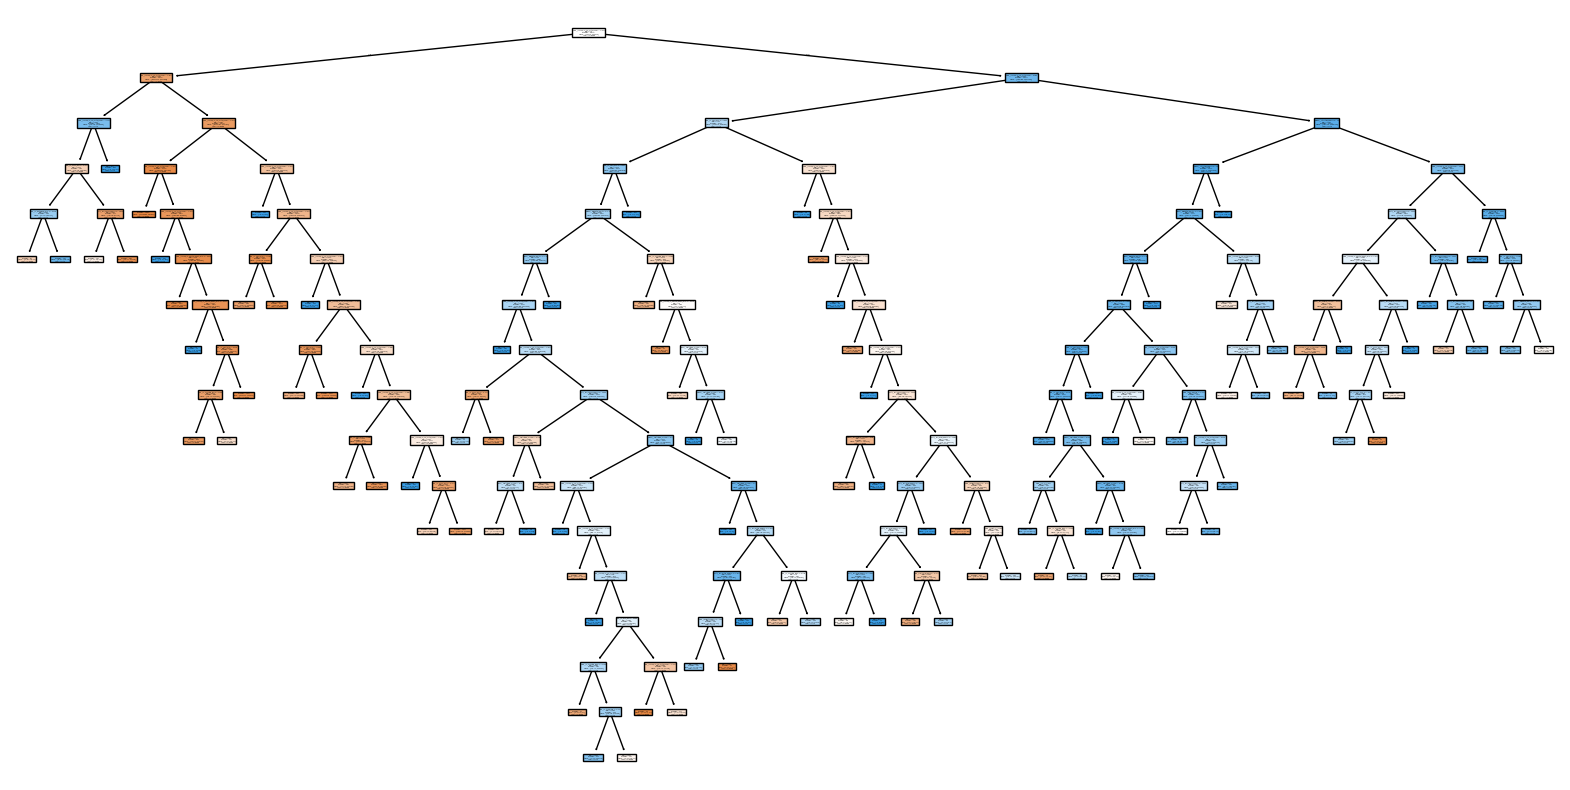

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Retrieve the best estimator (the best decision tree model from Grid Search)
best_tree = grid_tree.best_estimator_

# Set up the plot
plt.figure(figsize=(20, 10))  # Adjust the figure size for readability

# categorical_cols = df_full_categorical
# binary_cols = df_full_binary
# multicat_cols = df_full_multicat
# numeric_cols = df_full_numeric

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
#         ('multi', 'passthrough', multicat_cols),  # Assuming these are already encoded as numbers
#         ('binary', 'passthrough', binary_cols),   # Assuming these are binary (0/1)
#         ('num', StandardScaler(), numeric_cols)
#     ]
# )
# Plot the tree
plot_tree(
    best_tree,
    filled=True,                      # Colors the nodes by class
    feature_names=preprocessor.get_feature_names_out(),  # Use feature names from preprocessing
    class_names=['No Death', 'Death'] # Replace with appropriate class names
                     # Display only the top levels for readability; change as needed
)

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Retrieve the best estimator from GridSearchCV
best_tree = grid_tree.best_estimator_

# Get feature importances from the best model
feature_importances = best_tree.feature_importances_

# Create a DataFrame to display feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top features
print(feature_importance_df)

                                            Feature  Importance
0                num__apache_4a_hospital_death_prob    0.571405
1                     num__apache_4a_icu_death_prob    0.303208
2                         binary__diabetes_mellitus    0.049526
3                                  num__h1_spo2_max    0.025949
4            cat__apache_3j_bodysystem_Neurological    0.010387
5             cat__apache_3j_bodysystem_Respiratory    0.007036
6                              num__resprate_apache    0.005347
7                          binary__intubated_apache    0.005263
8                          multi__gcs_verbal_apache    0.005206
9                                  num__d1_spo2_min    0.004954
10                                  num__h1_mbp_min    0.004314
11              cat__apache_2_bodysystem_Neurologic    0.002868
12                             num__d1_resprate_min    0.002384
13                 cat__apache_3j_bodysystem_Sepsis    0.002153
14                                num__h

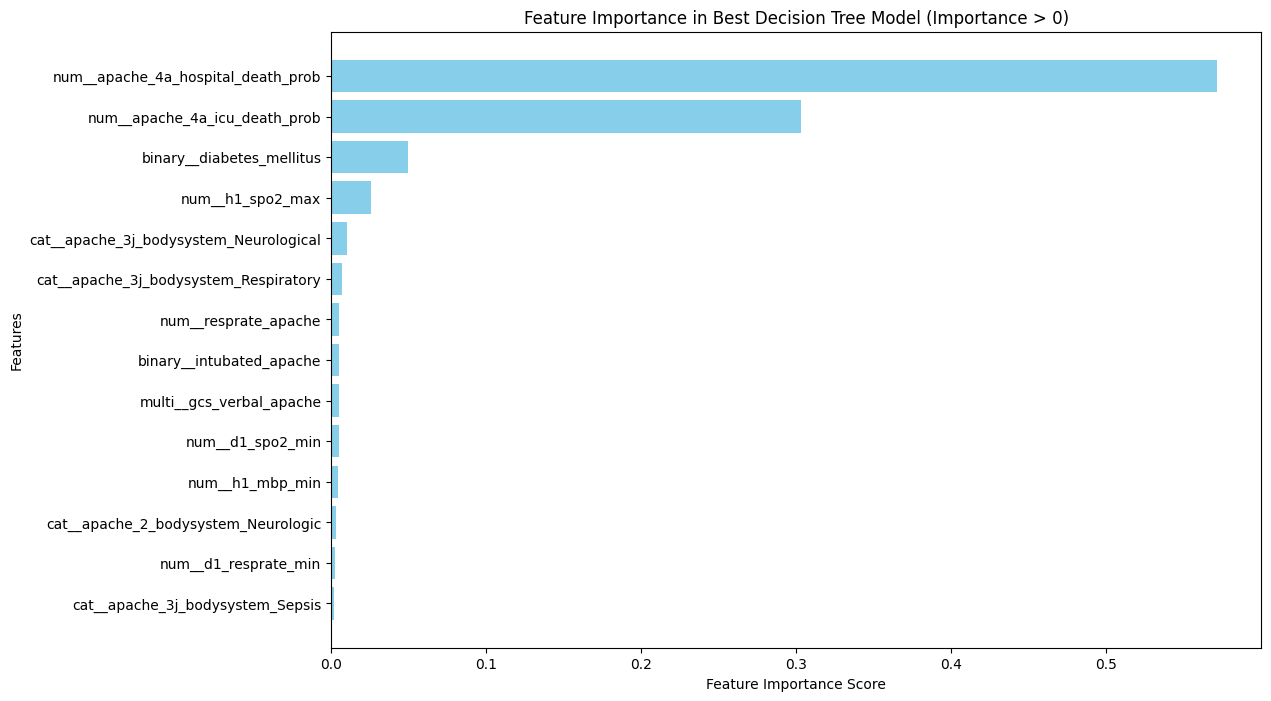

In [ ]:
import matplotlib.pyplot as plt

# Filter to include only features with importance greater than 0
important_features_df = feature_importance_df[feature_importance_df['Importance'] > 0]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Best Decision Tree Model (Importance > 0)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Assuming X_resampled and y_resampled are the resampled data from SMOTE + Tomek Links
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Define scoring metric focused on F1 for the minority class (class 1)
f1_minority = make_scorer(f1_score, pos_label=1)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_minority,  # Focuses on F1 for class 1
    cv=cv,
    n_jobs=-1,  # Use all available cores
    verbose=2
)

In [ ]:
grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=2)

In [ ]:
# Best parameters and best score
# print(type(grid_search.best_params_))
# print("Best parameters found: ", grid_search.best_params_)
# for i in grid_search.best_params_:
#   print(i,'\n')

for key, value in grid_search.best_params_.items():
    print(f"{key}: {value}")
print("Best F1 score for minority class: ", grid_search.best_score_)

# Predict on the original test set
best_rf = grid_search.best_estimator_
# Transform X_test using the same preprocessor pipeline
X_test_processed = preprocessor.transform(X_test)

# Now, use the transformed test set for prediction
y_pred = best_rf.predict(X_test_processed)

# Evaluate the performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

max_depth: 20
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Best F1 score for minority class:  0.9126743109995417
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12997
           1       0.61      0.52      0.56      1993

    accuracy                           0.89     14990
   macro avg       0.77      0.74      0.75     14990
weighted avg       0.89      0.89      0.89     14990



In [ ]:


# Evaluate model performance on training set
y_train_pred_rf = best_rf.predict(X_resampled)
train_accuracy_rf = accuracy_score(y_resampled, y_train_pred_rf)
print("\nTrain Accuracy Score:", train_accuracy_rf)

# Process test set with the same preprocessor (without resampling)
X_test_processed = preprocessor.transform(X_test)

# Predict and evaluate on the test set
y_test_pred_rf = best_rf.predict(X_test_processed)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("\nTest Accuracy Score:", test_accuracy_rf)


Train Accuracy Score: 0.998278988290974

Test Accuracy Score: 0.8924616410940627


In [ ]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top features
print(feature_importance_df)

                                            Feature  Importance
0                num__apache_4a_hospital_death_prob    0.109587
1                     num__apache_4a_icu_death_prob    0.092487
2                         binary__ventilated_apache    0.064947
3                          multi__gcs_verbal_apache    0.035194
4                          binary__intubated_apache    0.027009
5                                 num__d1_sysbp_min    0.026907
6                           multi__gcs_motor_apache    0.025366
7                            multi__gcs_eyes_apache    0.022784
8                                  num__d1_spo2_min    0.021818
9                                          num__age    0.020402
10                 cat__apache_3j_bodysystem_Sepsis    0.018533
11                      cat__icu_admit_source_Floor    0.017588
12                                 num__d1_temp_min    0.016551
13                             num__h1_resprate_max    0.013585
14                                num__h

In [ ]:
# Filter to include only features with importance greater than 0
# Filter to include only features with importance greater than 0 and round the values

feature_importance_df['Importance'] = feature_importance_df['Importance'].round(2)

top_n = 25
top_features_df = feature_importance_df.head(top_n)
top_features_df
print(top_features_df['Feature'].tolist())

['num__apache_4a_hospital_death_prob', 'num__apache_4a_icu_death_prob', 'binary__ventilated_apache', 'multi__gcs_verbal_apache', 'binary__intubated_apache', 'num__d1_sysbp_min', 'multi__gcs_motor_apache', 'multi__gcs_eyes_apache', 'num__d1_spo2_min', 'num__age', 'cat__apache_3j_bodysystem_Sepsis', 'cat__icu_admit_source_Floor', 'num__d1_temp_min', 'num__h1_resprate_max', 'num__h1_sysbp_min', 'num__temp_apache', 'num__d1_mbp_min', 'num__d1_resprate_max', 'num__h1_mbp_min', 'num__resprate_apache', 'cat__icu_type_Med-Surg ICU', 'num__h1_spo2_max', 'num__d1_diasbp_min', 'num__d1_potassium_max', 'num__h1_resprate_min']


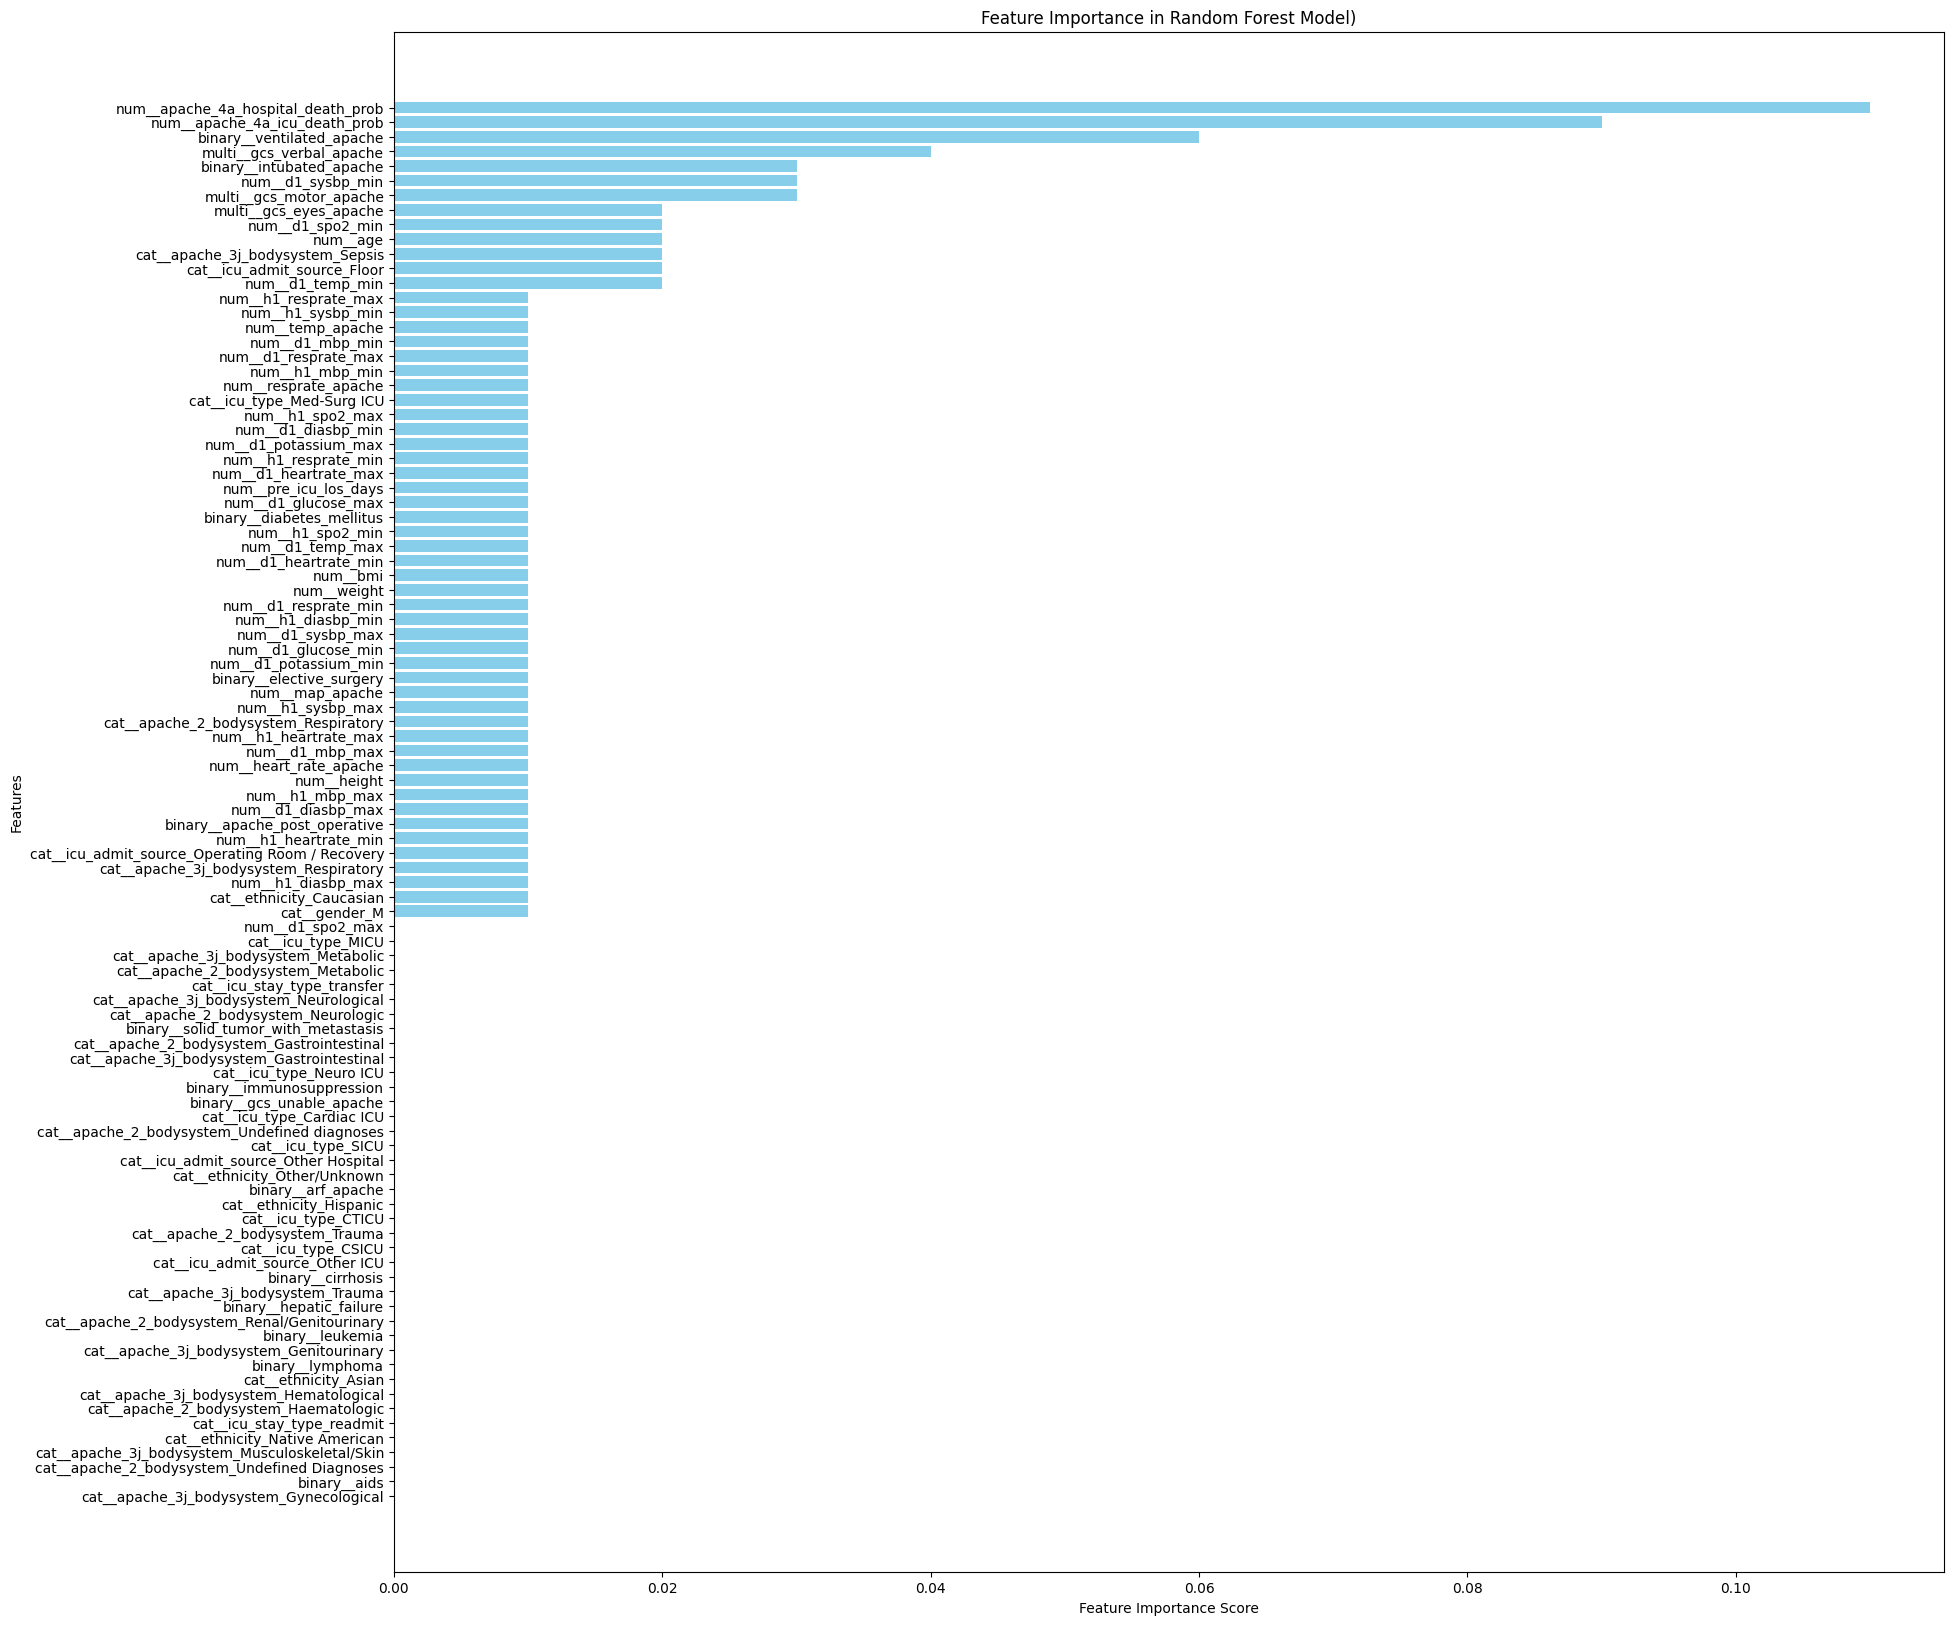

In [ ]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(20, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()
param_knn = { 'n_neighbors': range(3, 40, 3)}

# apply grid search:
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_resampled, y_resampled)

print(grid_knn.best_params_)
print(grid_knn.best_score_)



from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

best_n_neighbors = grid_knn.best_params_['n_neighbors']

# Initialize and fit KNN with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred = knn_best.predict(X_test_processed)

# Calculate F1 scores
# Overall F1 score for both classes (averaged)
overall_f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalance
print("Overall F1 Score (weighted):", overall_f1)

# F1 score for each class
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score for Class 0:", f1_class_0)
print("F1 Score for Class 1:", f1_class_1)

# Alternatively, print a full classification report to see precision, recall, and F1 for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

{'n_neighbors': 6}
0.86078270876047
Overall F1 Score (weighted): 0.8078034787421732
F1 Score for Class 0: 0.8640039815851686
F1 Score for Class 1: 0.44130175498381324

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     12997
           1       0.33      0.65      0.44      1993

    accuracy                           0.78     14990
   macro avg       0.64      0.73      0.65     14990
weighted avg       0.86      0.78      0.81     14990



In [ ]:


# Evaluate model performance on training set
y_train_pred_knn = knn_best.predict(X_resampled)
train_accuracy_knn = accuracy_score(y_resampled, y_train_pred_knn)
print("\nTrain Accuracy Score:", train_accuracy_knn)

# Process test set with the same preprocessor (without resampling)
X_test_processed = preprocessor.transform(X_test)

# Predict and evaluate on the test set
y_test_pred_knn = knn_best.predict(X_test_processed)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("\nTest Accuracy Score:", test_accuracy_knn)


Train Accuracy Score: 0.9049448354282553

Test Accuracy Score: 0.7812541694462976


In [ ]:
# List of column names excluding importance scores
top_features = [
    'num__apache_4a_hospital_death_prob', 'num__apache_4a_icu_death_prob', 'binary__ventilated_apache',
    'multi__gcs_verbal_apache', 'multi__gcs_motor_apache',
    'binary__intubated_apache', 'multi__gcs_eyes_apache', 'num__d1_sysbp_min', 'num__d1_spo2_min',
    'num__age', 'num__d1_temp_min', 'num__d1_mbp_min', 'num__d1_resprate_max',
    'binary__diabetes_mellitus', 'num__d1_heartrate_max', 'binary__apache_post_operative', 'num__d1_diasbp_min'
]

top_features= ['num__apache_4a_hospital_death_prob','num__apache_4a_icu_death_prob','binary__ventilated_apache','multi__gcs_verbal_apache','multi__gcs_motor_apache','multi__gcs_eyes_apache','binary__intubated_apache','num__d1_spo2_min','num__d1_sysbp_min','num__d1_temp_min','num__age','num__h1_spo2_max','num__d1_resprate_max','num__resprate_apache','num__temp_apache','num__h1_resprate_min','num__h1_resprate_max','num__d1_mbp_min','num__pre_icu_los_days','num__h1_spo2_min','num__d1_potassium_max','num__h1_mbp_min','num__d1_heartrate_max','num__h1_sysbp_min','num__d1_diasbp_min']

top_features = top_features_df['Feature'].tolist()
# Display the list for verification
print(top_features)


['num__apache_4a_hospital_death_prob', 'num__apache_4a_icu_death_prob', 'binary__ventilated_apache', 'multi__gcs_verbal_apache', 'binary__intubated_apache', 'num__d1_sysbp_min', 'multi__gcs_motor_apache', 'multi__gcs_eyes_apache', 'num__d1_spo2_min', 'num__age', 'cat__apache_3j_bodysystem_Sepsis', 'cat__icu_admit_source_Floor', 'num__d1_temp_min', 'num__h1_resprate_max', 'num__h1_sysbp_min', 'num__temp_apache', 'num__d1_mbp_min', 'num__d1_resprate_max', 'num__h1_mbp_min', 'num__resprate_apache', 'cat__icu_type_Med-Surg ICU', 'num__h1_spo2_max', 'num__d1_diasbp_min', 'num__d1_potassium_max', 'num__h1_resprate_min']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert X_resampled back to DataFrame and filter for the top 25 features
X_resampled_df = pd.DataFrame(X_resampled, columns=preprocessor.get_feature_names_out())
X_resampled_df = X_resampled_df[top_features]

# Step 4: Transform X_test without SMOTE and select only the top 25 features
X_test_processed = preprocessor.transform(X_test)
X_test_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())
X_test_df = X_test_df[top_features]

# Step 5: Set up Logistic Regression with GridSearchCV
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
param_grid = {
'C': [0.01, 0.1, 1, 10, 100],
'penalty': ['l1', 'l2'],
'solver': ['liblinear', 'saga'],
'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
}
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=2)

# Step 6: Fit GridSearchCV on the resampled training data with selected features
grid_search.fit(X_resampled_df, y_resampled)

# Step 7: Evaluate the best model on the test set
best_log_reg = grid_search.best_estimator_
y_test_pred = best_log_reg.predict(X_test_df)

# Predict on the test set
y_test_pred = best_log_reg.predict(X_test_df)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy on Test Set:", accuracy)
print("Best parameters for Logistic Regression:", )
for key, value in grid_search.best_params_.items():
    print(f"{key}: {value}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Model Accuracy on Test Set: 0.77631754503002
Best parameters for Logistic Regression:
C: 0.01
class_weight: balanced
penalty: l2
solver: saga

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     12997
           1       0.34      0.75      0.47      1993

    accuracy                           0.78     14990
   macro avg       0.65      0.77      0.66     14990
weighted avg       0.87      0.78      0.81     14990



In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy on Test Set:", accuracy)
print("Best parameters for Logistic Regression:", )
for key, value in grid_search.best_params_.items():
    print(f"{key}: {value}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Model Accuracy on Test Set: 0.77631754503002
Best parameters for Logistic Regression:
C: 0.01
class_weight: balanced
penalty: l2
solver: saga

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     12997
           1       0.34      0.75      0.47      1993

    accuracy                           0.78     14990
   macro avg       0.65      0.77      0.66     14990
weighted avg       0.87      0.78      0.81     14990

